<a href="https://colab.research.google.com/github/lkarjun/Data-Science-from-Scratch/blob/master/adaboost_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('bank_data_processed.csv')
df.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [3]:
x = df.drop('CreditCard', axis=1)
y = df.CreditCard

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [40]:
def classify(i, j):
  ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),
    i,
    j,
    'SAMME.R'
    # Stagewise Additive modeling using multiclass exp loss func
)
  return ada_clf

ada_clf = classify(100, .3)
ada_clf.fit(x_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [41]:
ada_clf.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
y_pred = ada_clf.predict(x_test)
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(accuracy_score(y_pred, y_test),
      recall_score(y_pred, y_test),
      precision_score(y_pred, y_test))

0.8166666666666667 0.8695652173913043 0.5128205128205128


In [59]:
import matplotlib.pyplot as plt

def do_it(lr, range_e):
  esti = 50
  pre = []
  re = []
  acc = []
  est = []
  while esti != range_e:
    ada = classify(esti, lr)
    ada.fit(x_train, y_train)
    y_pred = ada.predict(x_test)
    pre.append(precision_score(y_pred, y_test))
    acc.append(accuracy_score(y_pred, y_test))
    re.append(recall_score(y_pred, y_test))
    esti+=50
    est.append(esti)
  

  plt.plot(est, acc, label='acc')
  plt.plot(est, pre, label = 'pre')
  plt.plot(est, re, label = 're')
  plt.legend();

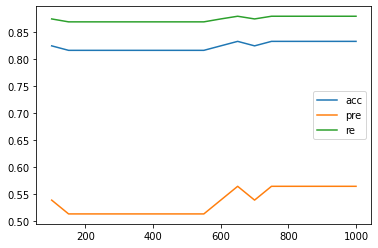

In [61]:
do_it(.2, 1000)

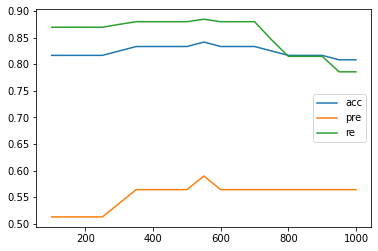

In [63]:
do_it(.4, 1000)